### Apendix B. Machine Learning Model

A combination of histogram of oriented gradients (HOG) and support vector machine (SVM) is used to recognize objects. HOG is used to extract features from an image, and SVM is used to correlate the image features to the image labels. The dataset used here is the Data/combined.csv, which is generated in **Appendix A**.


**Table of Contents**

1. Apply Histogram of Oriented Gradients (HOG)
2. Apply Support Vector Machine (SVM)

***

#### 1. Apply Histogram of Oriented Gradients (HOG)

In [1]:
# Code is adapted from ref. 3

#Inspect images
import numpy as np
import random
import glob

import cv2
import matplotlib.pyplot as plt

%matplotlib inline


#inspect array images in combined.csv
import pandas as pd
import cv2
import matplotlib.pyplot as plt

#load and check image
df=pd.read_csv("Data/combined.csv")

X=df.iloc[:,:3818]
#change X_DataFrame to a matrix
X=X.as_matrix()
X.shape #check

Y=df.iloc[:,3820]

#split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

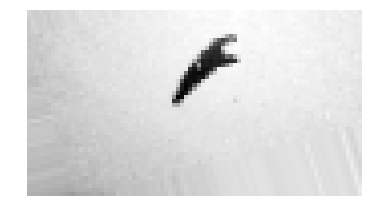

In [2]:
#open up any one of the training images to make sure that it can be retrieved 
plt.imshow(X_train[0,:].reshape(46,83), cmap='gray')
plt.axis('off')
plt.show()

In [3]:
from skimage import feature

data=[] #an empty array for storing hog transformed X_train data

#iterate through rows of X_train and extract features using hog
for image in X_train:
    #print(image.shape)
    img=image.reshape(46,83)
    hist = feature.hog(img, orientations = 9,
        pixels_per_cell = (8,8),
        cells_per_block = (3,3),
        transform_sqrt = False,block_norm='L2-Hys')
    data.append(hist)


#### 2. Apply and Save Support Vector Machine (SVM)

In [4]:
from sklearn.externals import joblib
from sklearn.svm import LinearSVC

#fit hog trnsformed features to labels
model=LinearSVC(random_state=42)
model.fit(data,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

In [5]:
#evaluate model accuracy
#first, transform X_test to hog features

test_data=[] #an empty array for storing test_data

#iterate through rows of X_test and extract features using hog
for image in X_test:
    #print(image.shape)
    img=image.reshape(46,83)
    hist = feature.hog(img, orientations = 9,
        pixels_per_cell = (8,8),
        cells_per_block = (3,3),
        transform_sqrt = False,block_norm='L2-Hys')
    test_data.append(hist)

print('The accuracy of the model is %.2f%%:' %(model.score(test_data,y_test)*100))

The accuracy of the model is 95.76%:


In [6]:
#save model to a file
joblib.dump(model,'Models/svm.cpickle')

['Models/svm.cpickle']

#### Test model

In [7]:
import matplotlib.pyplot as plt
import cv2
from skimage import feature

from sklearn.externals import joblib
from sklearn.svm import LinearSVC

#load model
load_model=joblib.load('Models/svm.cpickle') 


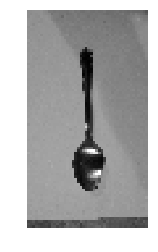

In [12]:
#load test image
im_test=cv2.imread("Images/spoon/spoon_1.jpg")

im_test_resize=cv2.resize(im_test,(46,83))
#gray the image
im_test_resize_gray=cv2.cvtColor(im_test_resize, cv2.COLOR_BGR2GRAY)

im_test_resize_gray.shape #check

#visualize image
plt.imshow(im_test_resize_gray, cmap='gray')
plt.axis('off')
plt.show()


In [13]:
#extract hog features
hist_test = feature.hog(im_test_resize_gray, orientations = 9,
    pixels_per_cell = (8,8),
    cells_per_block = (3,3),
    transform_sqrt = False,block_norm='L2-Hys')

hist_test=hist_test.reshape(1,hist_test.shape[0]) #reshape data 

hist_test.shape #check

#apply model
print('The object is a:', load_model.predict(hist_test)[0])

The object is a: spoon


#### References

1. Gabriel Garrido and Prateek Joshi, "OpenCV 3.x with Python By Example", Packt, 2018, Chpt. 9. 
2. Michael Beyeler, "Machine Learning for OpenCV", Packt, 2017, Chpt. 6.
3. Adrian Rosebrock, "Practical Python and OpenCV: Case Studies", 3rd Edition, pyimagesearch, 2016.